In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN,Dropout

In [22]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/spectral/data-preprocess.csv')
X = pd.read_csv('data/spectral/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [23]:
X_train = pd.read_csv('data/spectral/data-train.csv')
X_test = pd.read_csv('data/spectral/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [24]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [25]:
model = Sequential()
model.add(SimpleRNN(64,activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [0 if x <= 0.9 else (1 if 0.5 < x <= 1.0 else 2) for x in predictions]

Epoch 1/10


c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4119 - val_loss: 0.0000e+00 - val_accuracy: 0.4653
Epoch 2/10
38/83 [============>.................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4095

c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4489 - val_loss: 0.0000e+00 - val_accuracy: 0.5770
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5378 - val_loss: 0.0000e+00 - val_accuracy: 0.4320
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4501 - val_loss: 0.0000e+00 - val_accuracy: 0.4350
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4955 - val_loss: 0.0000e+00 - val_accuracy: 0.4879
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5132 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 7/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5908 - val_loss: 0.0000e+00 - val_accuracy: 0.6178
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6025 - val_loss: 0.0000e+0

In [27]:
np.unique(predictions)

array([0., 1.], dtype=float32)

In [28]:
np.unique(y_pred)

array([0, 1])

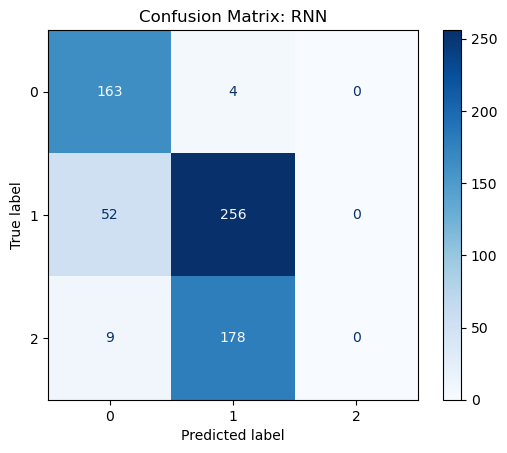

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.83       167
           1       0.58      0.83      0.69       308
           2       0.00      0.00      0.00       187

    accuracy                           0.63       662
   macro avg       0.44      0.60      0.51       662
weighted avg       0.46      0.63      0.53       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
